In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [46]:
mnist = tf.keras.datasets.mnist

In [47]:
(X_Train,Y_Train),(X_Test,Y_Test) = mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [50]:
rows, columns = 28 ,28

In [51]:
X_Train.shape[0]

60000

In [52]:
X_Train = X_Train.reshape(X_Train.shape[0],rows,columns,1)
X_Test = X_Test.reshape(X_Test.shape[0],rows,columns,1)
#X_Train.shape
print(X_Train)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [53]:
input_shape = [rows,columns,1]

In [54]:
X_Train = X_Train.astype('float32')
X_Test  = X_Test.astype('float32')
X_Train = X_Train/255.0
X_Test  = X_Test/255.0

In [55]:
Y_Train = tf.keras.utils.to_categorical(Y_Train,10)
Y_Test  = tf.keras.utils.to_categorical(Y_Test,10)

In [56]:
def construct_lenet(input_shape):
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(
                                    filters= 6,
                                    kernel_size = (5,5),
                                    strides=(1,1),
                                    activation='tanh',
                                    input_shape=input_shape))
    
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                            strides=(2,2)))
    
    model.add(tf.keras.layers.Conv2D(
                                    filters=16,
                                    kernel_size = (5,5),
                                    strides=(1,1),
                                    activation='tanh'))
    
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                            strides=(2,2)))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units=120,activation='tanh'))
    
    model.add(tf.keras.layers.Dense(units=84,activation='tanh'))
    
    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.1,momentum=0.0,decay=0.0),metrics=['accuracy'])
    
    return model

In [58]:
lenet = construct_lenet(input_shape)

epochs=10

history = lenet.fit(X_Train,Y_Train,
                    epochs=epochs,
                   batch_size=128)

loss , acc = lenet.evaluate(X_Test,Y_Test)
print('Accuracy :',acc)

Epoch 1/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.3926 - acc: 0.8895
Epoch 2/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.1575 - acc: 0.9540
Epoch 3/10
60000/60000 [==============================] - 22s 375us/sample - loss: 0.1084 - acc: 0.9679
Epoch 4/10
60000/60000 [==============================] - 22s 373us/sample - loss: 0.0852 - acc: 0.9750 - loss: 0.0856 - acc: 0.
Epoch 5/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0708 - acc: 0.9784 -
Epoch 6/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0611 - acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 26s 437us/sample - loss: 0.0539 - acc: 0.9841
Epoch 8/10
60000/60000 [==============================] - 25s 418us/sample - loss: 0.0482 - acc: 0.9857
Epoch 9/10
60000/60000 [==============================] - 32s 541us/sample - loss: 0.0438 - acc: 0.9875
Epoch 10/10
10000/10000 [============

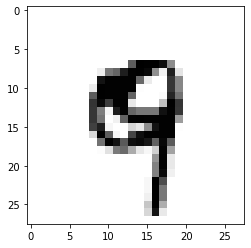

In [86]:
image_index = 4444
plt.imshow(X_Test[image_index].reshape(28,28),cmap='Greys')

In [90]:
pred = lenet.predict(X_Test[image_index].reshape(1,28,28,1))
print(pred.argmax())

9
